IMPORTING LIBRARIES

In [343]:
#import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine
from scipy import stats


LOADING MOVIE BUDGET DATASET

In [344]:
Movie_budgets = pd.read_csv("../Data/tn.movie_budgets.csv", low_memory=False)
Movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [345]:
#check missing values
Movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [346]:
#Check duplicates
Movie_budgets.duplicated().sum()

0

In [347]:
print(Movie_budgets.columns)
print(Movie_budgets.info())
print(Movie_budgets.isna().sum().sort_values(ascending=False))
print(Movie_budgets.duplicated().sum())

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
0


In [348]:
# Convert release_date to datetime
Movie_budgets['release_date'] = pd.to_datetime(Movie_budgets['release_date'], errors='coerce')

# Extract release year
Movie_budgets['release_year'] = Movie_budgets['release_date'].dt.year

# Clean movie title (lowercase, strip spaces)
Movie_budgets['movie_clean'] = Movie_budgets['movie'].str.lower().str.strip()


In [349]:
#drop the $ Dollar sign and , from production_budget, domestic_gross and worldwide_gross columns
Movie_budgets['production_budget'] = Movie_budgets['production_budget'].str.replace('$','').str.replace(',','')
Movie_budgets['domestic_gross'] = Movie_budgets['domestic_gross'].str.replace('$','').str.replace(',','')
Movie_budgets['worldwide_gross'] = Movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','')

In [350]:
#changing tatetime format
Movie_budgets['release_date'] = pd.to_datetime(Movie_budgets['release_date'], errors='coerce')

In [351]:
#Changing the production budget, domestic gross and worldwide gross  to numeric
Movie_budgets['production_budget'] = pd.to_numeric(Movie_budgets['production_budget'], errors='coerce')
Movie_budgets['domestic_gross'] = pd.to_numeric(Movie_budgets['domestic_gross'], errors='coerce')
Movie_budgets['worldwide_gross'] = pd.to_numeric(Movie_budgets['worldwide_gross'], errors='coerce')

In [352]:
# Create profit column to determine net earnings by subtracting production costs from total revenues.

Movie_budgets['profit'] = Movie_budgets['worldwide_gross'] - Movie_budgets['production_budget']

In [353]:
Movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_clean,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,avatar,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,pirates of the caribbean: on stranger tides,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,dark phoenix,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,avengers: age of ultron,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,star wars ep. viii: the last jedi,999721747


In [354]:
Movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int32         
 7   movie_clean        5782 non-null   object        
 8   profit             5782 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(5), object(2)
memory usage: 384.1+ KB


LOADING TMDB MOVIES

In [355]:
Movies_tmdb = pd.read_csv("../Data/tmdb.movies.csv", low_memory=False)
Movies_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [356]:
Movies_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [357]:
print(Movies_tmdb.columns)
print(Movies_tmdb.info())
print(Movies_tmdb.isna().sum().sort_values(ascending=False))
print(Movies_tmdb.duplicated().sum())

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None
Unnamed: 0           0
genre_ids            0
id                   0
o

CLEANING MOVIES_TMDB DATASET

In [358]:
#release_date column to datetime format
Movies_tmdb['release_date'] = pd.to_datetime(Movies_tmdb['release_date'], errors='coerce')

In [359]:
# drop the unnamed column
Movies_tmdb = Movies_tmdb.drop(columns=['Unnamed: 0'])

In [360]:
# Convert release_date to datetime
Movies_tmdb['release_date'] = pd.to_datetime(Movies_tmdb['release_date'], errors='coerce')

# Extract year
Movies_tmdb['year'] = Movies_tmdb['release_date'].dt.year

# Clean title
Movies_tmdb['title_clean'] = Movies_tmdb['title'].str.lower().str.strip()


In [361]:
Movies_tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
title_clean          0
dtype: int64

In [362]:
Movies_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   year               26517 non-null  int32         
 10  title_clean        26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 2.1+ MB


In [363]:
Movies_tmdb.duplicated().sum()

1020

LOADING MOVIE GROSS DATASET

In [364]:
Movie_bom = pd.read_csv('../Data/bom.movie_gross.csv', low_memory=False)
Movie_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [365]:
Movie_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


CLEANING MOVIE_BOM DATASET

In [366]:
# Convert foreign_gross to numeric
Movie_bom['foreign_gross'] = pd.to_numeric(Movie_bom['foreign_gross'], errors='coerce')

# Drop rows missing both gross values
Movie_bom= Movie_bom.dropna(subset=['domestic_gross'], how='all')

# Fill missing foreign_gross with median (preserve 70%+)
median_foreign = Movie_bom['foreign_gross'].median()
Movie_bom['foreign_gross'].fillna(median_foreign, inplace=True)

# Fill missing studio with "Unknown"
Movie_bom['studio'].fillna("Unknown", inplace=True)

# Create a clean title column
Movie_bom['title_clean'] = Movie_bom['title'].str.lower().str.strip() 

#change year to datetime
Movie_bom['year']=pd.to_datetime(Movie_bom['year'])

Movie_bom['worldwide_gross']=Movie_bom['foreign_gross']+Movie_bom['foreign_gross']

In [367]:
Movie_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            3359 non-null   object        
 1   studio           3359 non-null   object        
 2   domestic_gross   3359 non-null   float64       
 3   foreign_gross    3359 non-null   float64       
 4   year             3359 non-null   datetime64[ns]
 5   title_clean      3359 non-null   object        
 6   worldwide_gross  3359 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 209.9+ KB


LOADING THE IM.DB DATABASE

In [368]:
# Connect to the imdb-style database
conn = sqlite3.connect("../Data/im.db")

# List all tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in im.db:")
print(tables)

Tables in im.db:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


LOADING MOVIE_BASICS TABLE

In [369]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_basics.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [370]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


LOADING MOVIE_RATINGS TABLE

In [371]:
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [372]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


COMBINING MOVIE_BASICS AND MOVIE_RATING INTO ONE TABLE NAMED DF_IMDB

In [373]:
#merging movie_basics and movie_ratings on movie_id

df_imdb = pd.read_sql('''SELECT *
               FROM movie_basics 
               JOIN movie_ratings 
               USING(movie_id);
            ''', conn)
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


CLEANING THE MERGED TABLE DF_IMDB

In [374]:
df_imdb['title_clean'] = df_imdb['primary_title'].str.lower().str.strip()
df_imdb['year'] = pd.to_datetime(df_imdb['start_year'], errors='coerce')

In [ ]:

#drop runtime_minutes
df_imdb = df_imdb.dropna(subset=['runtime_minutes'])


#fill missing genres with unknown to preserve data
df_imdb['genres']=df_imdb['genres'].fillna('Unknown')

In [376]:
#recheck percentage of missing values
(df_imdb.isna().sum() / len(df_imdb) * 100).sort_values(ascending=False)

movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
title_clean        0.0
year               0.0
dtype: float64

 COMBINING DF_IMDB WITH MOVIE_BUDGETS

In [377]:
# merging the  datasets
df_imdb_movie_budgets= pd.merge(df_imdb, Movie_budgets, how="inner", left_on="primary_title", right_on="movie")
df_imdb_movie_budgets.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_clean,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_clean,profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,1970-01-01 00:00:00.000002012,26,2012-12-31,Foodfight!,45000000,0,73706,2012,foodfight!,-44926294
1,tt0326592,The Overnight,The Overnight,2010,88.0,Unknown,7.5,24,the overnight,1970-01-01 00:00:00.000002010,21,2015-06-19,The Overnight,200000,1109808,1165996,2015,the overnight,965996
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,the overnight,1970-01-01 00:00:00.000002015,21,2015-06-19,The Overnight,200000,1109808,1165996,2015,the overnight,965996
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,1970-01-01 00:00:00.000002012,17,2013-03-22,On the Road,25000000,720828,9313302,2013,on the road,-15686698
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,on the road,1970-01-01 00:00:00.000002014,17,2013-03-22,On the Road,25000000,720828,9313302,2013,on the road,-15686698


In [378]:
df_imdb_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2757 non-null   object        
 1   primary_title      2757 non-null   object        
 2   original_title     2757 non-null   object        
 3   start_year         2757 non-null   int64         
 4   runtime_minutes    2757 non-null   float64       
 5   genres             2757 non-null   object        
 6   averagerating      2757 non-null   float64       
 7   numvotes           2757 non-null   int64         
 8   title_clean        2757 non-null   object        
 9   year               2757 non-null   datetime64[ns]
 10  id                 2757 non-null   int64         
 11  release_date       2757 non-null   datetime64[ns]
 12  movie              2757 non-null   object        
 13  production_budget  2757 non-null   int64         
 14  domestic

CLEANING THE MERGED DATASET

In [379]:

# check for duplicate records. in this case, rows are considered duplicates if the values in these columns are the same.
duplicates = df_imdb_movie_budgets[df_imdb_movie_budgets.duplicated(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'])]
duplicates

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_clean,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_clean,profit
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,the overnight,1970-01-01 00:00:00.000002015,21,2015-06-19,The Overnight,200000,1109808,1165996,2015,the overnight,965996
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,on the road,1970-01-01 00:00:00.000002014,17,2013-03-22,On the Road,25000000,720828,9313302,2013,on the road,-15686698
5,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,on the road,1970-01-01 00:00:00.000002016,17,2013-03-22,On the Road,25000000,720828,9313302,2013,on the road,-15686698
24,tt4453750,Before We Go,Before We Go,2014,84.0,"Documentary,Drama,News",7.0,22,before we go,1970-01-01 00:00:00.000002014,52,2015-09-04,Before We Go,3000000,37151,483938,2015,before we go,-2516062
29,tt4028068,Wonder Woman,Wonder Woman,2014,60.0,Sci-Fi,4.2,20,wonder woman,1970-01-01 00:00:00.000002014,55,2017-06-02,Wonder Woman,150000000,412563408,821133378,2017,wonder woman,671133378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,tt6864720,The Net,Nevod,2017,75.0,Drama,5.3,18,the net,1970-01-01 00:00:00.000002017,16,1995-07-28,The Net,22000000,50621733,110521733,1995,the net,88521733
2659,tt8630424,Swingers,Swingers,2018,86.0,Comedy,4.2,103,swingers,1970-01-01 00:00:00.000002018,16,1996-10-18,Swingers,200000,4505922,6618578,1996,swingers,6418578
2675,tt6852284,Venus,Venus,2017,95.0,"Comedy,Drama,Family",5.9,161,venus,1970-01-01 00:00:00.000002017,62,2006-12-21,Venus,6000000,3347411,7818479,2006,venus,1818479
2688,tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",7.6,305031,a quiet place,1970-01-01 00:00:00.000002018,66,2018-04-06,A Quiet Place,17000000,188024361,334522294,2018,a quiet place,317522294


In [380]:
# Drop duplicates 
df_imdb_movie_budgets = df_imdb_movie_budgets.drop_duplicates(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'], keep='first')

# confirm duplicates have been dropped.
df_imdb_movie_budgets.duplicated().sum()

0

In [381]:
#droping missing values
df_imdb_movie_budgets.dropna(inplace= True)

In [382]:
df_imdb_movie_budgets.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_clean,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_clean,profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,foodfight!,1970-01-01 00:00:00.000002012,26,2012-12-31,Foodfight!,45000000,0,73706,2012,foodfight!,-44926294
1,tt0326592,The Overnight,The Overnight,2010,88.0,Unknown,7.5,24,the overnight,1970-01-01 00:00:00.000002010,21,2015-06-19,The Overnight,200000,1109808,1165996,2015,the overnight,965996
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,on the road,1970-01-01 00:00:00.000002012,17,2013-03-22,On the Road,25000000,720828,9313302,2013,on the road,-15686698
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,the secret life of walter mitty,1970-01-01 00:00:00.000002013,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,the secret life of walter mitty,96861183
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,a walk among the tombstones,1970-01-01 00:00:00.000002014,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,a walk among the tombstones,34108587


READING RT.REVIEWS AND MOVIE INFO

In [383]:
#reading the rt.reviews dataset
rt_reviews = pd.read_csv("../Data/rt.reviews.tsv", sep='\t', encoding ='latin-1', low_memory=False)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [384]:
#reading the rt.movies_info dataset
rt_movies_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding ='latin-1', low_memory=False)
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


COMBINING MOVIE BUDGET AND MOVIE GROSS

In [385]:
df_box = pd.merge(Movie_budgets, Movie_bom,
                  left_on='movie',
                  right_on='title',
                  how='inner')


print(f"Shape: {df_box.shape}")
print(f"\nFirst rows of the data:")
df_box.head(3)

Shape: (1245, 16)

First rows of the data:


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross_x,release_year,movie_clean,profit,title,studio,domestic_gross_y,foreign_gross,year,title_clean,worldwide_gross_y
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,pirates of the caribbean: on stranger tides,635063875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,1970-01-01 00:00:00.000002011,pirates of the caribbean: on stranger tides,1.609200e+09
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,avengers: age of ultron,1072413963,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1970-01-01 00:00:00.000002015,avengers: age of ultron,1.892800e+09
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,avengers: infinity war,1748134200,Avengers: Infinity War,BV,678800000.0,19550000.0,1970-01-01 00:00:00.000002018,avengers: infinity war,3.910000e+07


In [386]:
df_box.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross_x    0
release_year         0
movie_clean          0
profit               0
title                0
studio               0
domestic_gross_y     0
foreign_gross        0
year                 0
title_clean          0
worldwide_gross_y    0
dtype: int64

VISUALIZATION

DISTRIBUTION OF GENRES 

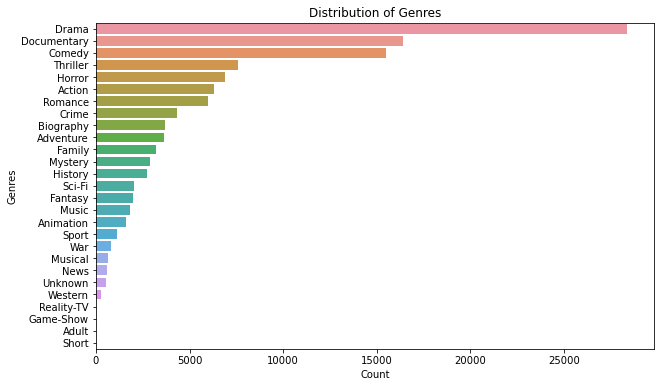

In [387]:
# Distribution of genres
plt.figure(figsize=(10, 6))
df_imdb_exploded = df_imdb['genres'].str.split(',').explode()
sns.countplot(y=df_imdb_exploded, order=df_imdb_exploded.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

AVERAGE RATINGS BY AGE

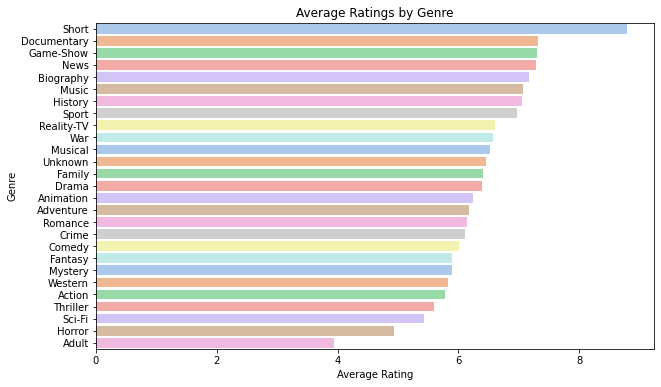

In [ ]:
# Exploding genres to handle multiple genres per movie
df_imdb_exploded = (
    df_imdb.assign(genres=df_imdb['genres'].str.split(','))
           .explode('genres')
)


# Calculating the average rating for each genre
genre_avg_rating = df_imdb_exploded.groupby('genres')['averagerating'].mean().reset_index().sort_values(by = 'averagerating', ascending=False)


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='averagerating', y='genres', data=genre_avg_rating, palette='pastel')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

TOP 20 MOVIES BY PROFIT

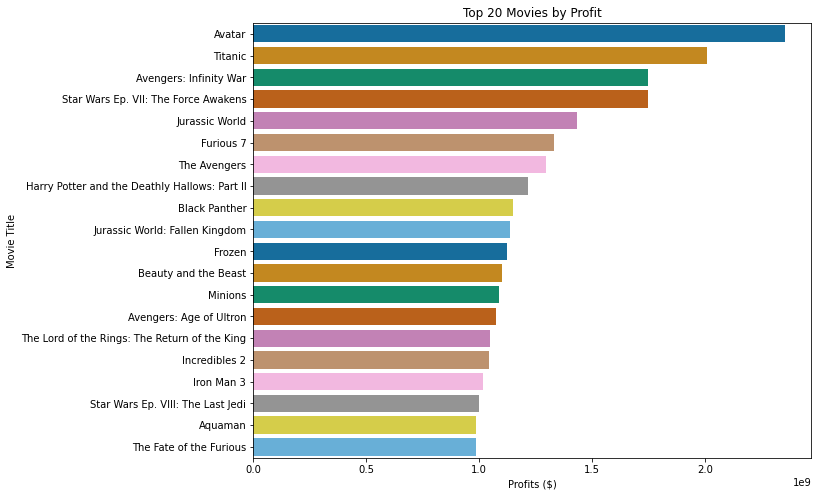

In [389]:
fig , ax = plt.subplots(figsize = (10,8))
# get the top 20 profitable movies
Most_profitable = Movie_budgets.nlargest(n = 20, columns= 'profit')

sns.barplot(x='profit', y='movie', data=Most_profitable, ax=ax, palette="colorblind")

# Set axis labels and title
ax.set_xlabel('Profits ($)')
ax.set_ylabel('Movie Title')
plt.title('Top 20 Movies by Profit')

# plt.savefig('top_20_movies_by_profit.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

COMPARING FOREIGN GROSS AND DOMESTIC GROSS

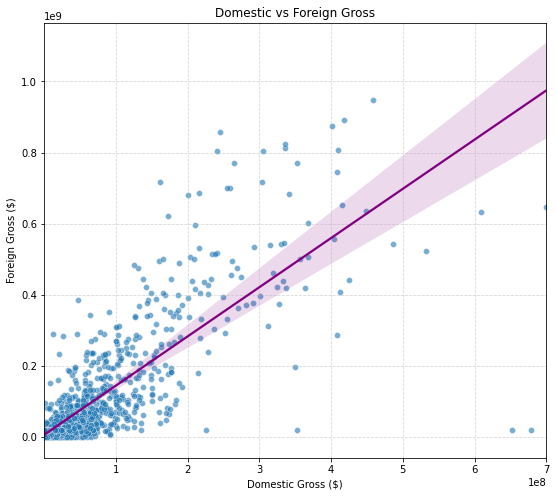

In [390]:
plt.figure(figsize=(9,8))
sns.scatterplot(x='domestic_gross_y', y='foreign_gross', data=df_box, alpha=0.6)
sns.regplot(x='domestic_gross_y', y='foreign_gross', data=df_box, scatter=False, color='purple')
plt.title('Domestic vs Foreign Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Foreign Gross ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

HYPOTHESIS TESTING

 1. Domestic vs. Foreign Gross

To check whether domestic gross is significantly different from foreign gross for the same movie

In [391]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(df_box['domestic_gross_y'], df_box['foreign_gross'])
print("t-statistic:", t_stat)
print("p-value:", p_val)

print("                     ")
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference between domestic and foreign gross.")
else:
    print("Fail to reject the null hypothesis: No significant difference between domestic and foreign gross.")
    

t-statistic: -11.247984572985661
p-value: 5.065006802574202e-28
                     
Reject the null hypothesis: Significant difference between domestic and foreign gross.


2: Studio Profitability


- **Null Hypothesis (H0):** The average profit is the same across the top 5 studios.
- **Alternative Hypothesis (H1):** At least one studio's average profit is different.

In [392]:
from scipy.stats import f_oneway

# Select top 5 studios by number of movies
top_studios = df_box['studio'].value_counts().head(5).index
profits_by_studio = [df_box[df_box['studio']==studio]['profit'] for studio in top_studios]

f_stat, p_val = f_oneway(*profits_by_studio)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

print("             ")
alpha = 0.05
if p_val < alpha:
    print("Reject Null Hypothesis (H₀): There is a significant difference in average profits among the studio")
else:
    print("Fail to Reject Null Hypothesis (H₀): There is no significant difference in average profits among the studios.")


F-statistic: 0.9881
p-value: 0.4136
             
Fail to Reject Null Hypothesis (H₀): There is no significant difference in average profits among the studios.
